In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyecharts import options as opts
from pyecharts.charts import *
from pyecharts.faker import Faker
from pyecharts.commons.utils import JsCode
from pyecharts.globals import ThemeType
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [19]:
# 读取与预览数据
data = pd.read_csv('../data/HR_Analytics.csv')
data.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [21]:
# 数据清洗与预处理
# 删除空值
data.isna().sum()

EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
Training

In [22]:
data.dropna(subset=['YearsWithCurrManager'], inplace=True)
data.isna().sum()

EmpID                       0
Age                         0
AgeGroup                    0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
SalarySlab                  0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBa

In [23]:
# 删除重复值
data.duplicated().sum()

7

In [24]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [25]:
# 查看属性唯一数值个数，并删除常数列
data.nunique()

EmpID                       1413
Age                           43
AgeGroup                       5
Attrition                      2
BusinessTravel                 4
DailyRate                    867
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1413
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1303
SalarySlab                     4
MonthlyRate                 1373
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptio

In [26]:
data.drop('EmployeeCount', axis=1, inplace=True)
data.drop('Over18', axis=1, inplace=True)
data.drop('StandardHours', axis=1, inplace=True)
data.nunique()

EmpID                       1413
Age                           43
AgeGroup                       5
Attrition                      2
BusinessTravel                 4
DailyRate                    867
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeNumber              1413
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1303
SalarySlab                     4
MonthlyRate                 1373
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [27]:
category_columns = ['AgeGroup', 'Attrition', 'BusinessTravel', 'Department','EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'SalarySlab']
data[category_columns] = data[category_columns].astype('category')
data.dtypes

EmpID                         object
Age                            int64
AgeGroup                    category
Attrition                   category
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                      int64
EducationField              category
EmployeeNumber                 int64
EnvironmentSatisfaction        int64
Gender                      category
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobRole                     category
JobSatisfaction                int64
MaritalStatus               category
MonthlyIncome                  int64
SalarySlab                  category
MonthlyRate                    int64
NumCompaniesWorked             int64
OverTime                      object
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
S

In [28]:
data['BusinessTravel'] = data['BusinessTravel'].replace('TravelRarely', 'Travel_Rarely')
data['BusinessTravel'].head(10)

0        Travel_Rarely
1        Travel_Rarely
2    Travel_Frequently
3           Non-Travel
4           Non-Travel
5           Non-Travel
6    Travel_Frequently
7           Non-Travel
8        Travel_Rarely
9        Travel_Rarely
Name: BusinessTravel, dtype: category
Categories (3, object): ['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']

In [12]:
# 统计离职与未离职员工占比
d = data['Attrition'].value_counts()
x = list(d.index)
y = [int(z) for z in d.values]

c = (
    Pie()
    .add(
        "",
        [
            list(z)
            for z in zip(
                x, y
            )
        ],
        center=["40%", "50%"],
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="统计离职与未离职员工占比"),
        legend_opts=opts.LegendOpts(type_="scroll", pos_left="80%", orient="vertical"),
    )
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
)
c.render_notebook()

In [13]:
# 各个因素与离职率的关系
d1 = data.groupby('AgeGroup')['Attrition'].count()
d1_y = data[data['Attrition'] == 'Yes'].groupby('AgeGroup')['Attrition'].count()
d1_n = data[data['Attrition'] == 'No'].groupby('AgeGroup')['Attrition'].count()

d2 = data.groupby('Gender')['Attrition'].count()
d2_y = data[data['Attrition'] == 'Yes'].groupby('Gender')['Attrition'].count()
d2_n = data[data['Attrition'] == 'No'].groupby('Gender')['Attrition'].count()

d3 = data.groupby('MaritalStatus')['Attrition'].count()
d3_y = data[data['Attrition'] == 'Yes'].groupby('MaritalStatus')['Attrition'].count()
d3_n = data[data['Attrition'] == 'No'].groupby('MaritalStatus')['Attrition'].count()

d4 = data.groupby('Education')['Attrition'].count()
d4_y = data[data['Attrition'] == 'Yes'].groupby('Education')['Attrition'].count() 
d4_n = data[data['Attrition'] == 'No'].groupby('Education')['Attrition'].count()

d5 = data.groupby('EducationField')['Attrition'].count()
d5_y = data[data['Attrition'] == 'Yes'].groupby('EducationField')['Attrition'].count()
d5_n = data[data['Attrition'] == 'No'].groupby('EducationField')['Attrition'].count()

d6 = data.groupby('BusinessTravel')['Attrition'].count()
d6_y = data[data['Attrition'] == 'Yes'].groupby('BusinessTravel')['Attrition'].count()
d6_n = data[data['Attrition'] == 'No'].groupby('BusinessTravel')['Attrition'].count()

d7 = data.groupby('Department')['Attrition'].count()
d7_y = data[data['Attrition'] == 'Yes'].groupby('Department')['Attrition'].count()
d7_n = data[data['Attrition'] == 'No'].groupby('Department')['Attrition'].count()

d8_y = data[data['Attrition'] == 'Yes']['DistanceFromHome']
d8_n = data[data['Attrition'] == 'No']['DistanceFromHome']

d9 = data.groupby('JobRole')['Attrition'].count()
d9_y = data[data['Attrition'] == 'Yes'].groupby('JobRole')['Attrition'].count()
d9_n = data[data['Attrition'] == 'No'].groupby('JobRole')['Attrition'].count()

d10 = data.groupby('JobInvolvement')['Attrition'].count()
d10_y = data[data['Attrition'] == 'Yes'].groupby('JobInvolvement')['Attrition'].count()
d10_n = data[data['Attrition'] == 'No'].groupby('JobInvolvement')['Attrition'].count()

d11 = data.groupby('JobLevel')['Attrition'].count()
d11_y = data[data['Attrition'] == 'Yes'].groupby('JobLevel')['Attrition'].count()
d11_n = data[data['Attrition'] == 'No'].groupby('JobLevel')['Attrition'].count()

d12_y = data[data['Attrition'] == 'Yes']['MonthlyIncome']
d12_n = data[data['Attrition'] == 'No']['MonthlyIncome']

d13 = data.groupby('EnvironmentSatisfaction')['Attrition'].count()
d13_y = data[data['Attrition'] == 'Yes'].groupby('EnvironmentSatisfaction')['Attrition'].count()
d13_n = data[data['Attrition'] == 'No'].groupby('EnvironmentSatisfaction')['Attrition'].count()

d14 = data.groupby('JobSatisfaction')['Attrition'].count()
d14_y = data[data['Attrition'] == 'Yes'].groupby('JobSatisfaction')['Attrition'].count()
d14_n = data[data['Attrition'] == 'No'].groupby('JobSatisfaction')['Attrition'].count()

d15 = data.groupby('RelationshipSatisfaction')['Attrition'].count()
d15_y = data[data['Attrition'] == 'Yes'].groupby('RelationshipSatisfaction')['Attrition'].count()
d15_n = data[data['Attrition'] == 'No'].groupby('RelationshipSatisfaction')['Attrition'].count()

d16 = data.groupby('WorkLifeBalance')['Attrition'].count()
d16_y = data[data['Attrition'] == 'Yes'].groupby('WorkLifeBalance')['Attrition'].count()
d16_n = data[data['Attrition'] == 'No'].groupby('WorkLifeBalance')['Attrition'].count()

d17_y = data[data['Attrition'] == 'Yes']['PercentSalaryHike']
d17_n = data[data['Attrition'] == 'No']['PercentSalaryHike']

d18 = data.groupby('PerformanceRating')['Attrition'].count()
d18_y = data[data['Attrition'] == 'Yes'].groupby('PerformanceRating')['Attrition'].count()
d18_n = data[data['Attrition'] == 'No'].groupby('PerformanceRating')['Attrition'].count()

d19 = data.groupby('StockOptionLevel')['Attrition'].count()
d19_y = data[data['Attrition'] == 'Yes'].groupby('StockOptionLevel')['Attrition'].count()
d19_n = data[data['Attrition'] == 'No'].groupby('StockOptionLevel')['Attrition'].count()

d20 = data.groupby('TrainingTimesLastYear')['Attrition'].count()
d20_y = data[data['Attrition'] == 'Yes'].groupby('TrainingTimesLastYear')['Attrition'].count()
d20_n = data[data['Attrition'] == 'No'].groupby('TrainingTimesLastYear')['Attrition'].count()

d21_y = data[data['Attrition'] == 'Yes']['YearsAtCompany']
d21_n = data[data['Attrition'] == 'No']['YearsAtCompany']

d22_y = data[data['Attrition'] == 'Yes']['YearsInCurrentRole']
d22_n = data[data['Attrition'] == 'No']['YearsInCurrentRole']

d23_y = data[data['Attrition'] == 'Yes']['YearsSinceLastPromotion']
d23_n = data[data['Attrition'] == 'No']['YearsSinceLastPromotion']

d24_y = data[data['Attrition'] == 'Yes']['YearsWithCurrManager']
d24_n = data[data['Attrition'] == 'No']['YearsWithCurrManager']

C:\Users\PXB\AppData\Local\Temp\ipykernel_8992\1388733090.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d1 = data.groupby('AgeGroup')['Attrition'].count()
C:\Users\PXB\AppData\Local\Temp\ipykernel_8992\1388733090.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d1_y = data[data['Attrition'] == 'Yes'].groupby('AgeGroup')['Attrition'].count()
C:\Users\PXB\AppData\Local\Temp\ipykernel_8992\1388733090.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the futur

In [14]:
def bar1() -> Bar:
    x = list(d1.index)
    y1 = [{"value": y, "percent": y / m} for y, m in zip(d1_y, d1)]
    y2 = [{"value": n, "percent": n / m} for n, m in zip(d1_n, d1)]
    c = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
    .add_xaxis(x)
    .add_yaxis("离职", y1, stack="stack1", category_gap="50%")
    .add_yaxis("在职", y2, stack="stack1", category_gap="50%")
    .set_series_opts(
        label_opts=opts.LabelOpts(
            position="right",
            formatter=JsCode(
                "function(x){return Number(x.data.percent * 100).toFixed() + '%';}"
            ),
        ),
        title_opts=opts.TitleOpts(title="年龄段与离职的关系"),
    )
    )
    return c

def bar2() -> Bar:
    x = list(d2.index)
    y1 = [{"value": y, "percent": y / m} for y, m in zip(d2_y, d2)]
    y2 = [{"value": n, "percent": n / m} for n, m in zip(d2_n, d2)]
    c = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
    .add_xaxis(x)
    .add_yaxis("离职", y1, stack="stack1", category_gap="50%")
    .add_yaxis("在职", y2, stack="stack1", category_gap="50%")
    .set_series_opts(
        label_opts=opts.LabelOpts(
            position="right",
            formatter=JsCode(
                "function(x){return Number(x.data.percent * 100).toFixed() + '%';}"
            ),
        ),
        title_opts=opts.TitleOpts(title="性别与离职的关系"),
    )
    )
    return c

def bar3() -> Bar:
    x = list(d3.index)
    y1 = [{"value": y, "percent": y / m} for y, m in zip(d3_y, d3)]
    y2 = [{"value": n, "percent": n / m} for n, m in zip(d3_n, d3)]
    c = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
    .add_xaxis(x)
    .add_yaxis("离职", y1, stack="stack1", category_gap="50%")
    .add_yaxis("在职", y2, stack="stack1", category_gap="50%")
    .set_series_opts(
        label_opts=opts.LabelOpts(
            position="right",
            formatter=JsCode(
                "function(x){return Number(x.data.percent * 100).toFixed() + '%';}"
            ),
        ),
        title_opts=opts.TitleOpts(title="婚姻状况与离职的关系"),
    )
    )
    return c

def bar4() -> Bar:
    x = list(d4.index)
    y1 = [{"value": y, "percent": y / m} for y, m in zip(d4_y, d4)]
    y2 = [{"value": n, "percent": n / m} for n, m in zip(d4_n, d4)]
    c = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
    .add_xaxis(x)
    .add_yaxis("离职", y1, stack="stack1", category_gap="50%")
    .add_yaxis("在职", y2, stack="stack1", category_gap="50%")
    .set_series_opts(
        label_opts=opts.LabelOpts(
            position="right",
            formatter=JsCode(
                "function(x){return Number(x.data.percent * 100).toFixed() + '%';}"
            ),
        ),
        title_opts=opts.TitleOpts(title="教育等级与离职的关系"),
    )
    )
    return c

def bar5() -> Bar:
    x = list(d5.index)
    y1 = [{"value": y, "percent": y / m} for y, m in zip(d5_y, d5)]
    y2 = [{"value": n, "percent": n / m} for n, m in zip(d5_n, d5)]
    c = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
    .add_xaxis(x)
    .add_yaxis("离职", y1, stack="stack1", category_gap="50%")
    .add_yaxis("在职", y2, stack="stack1", category_gap="50%")
    .set_series_opts(
        label_opts=opts.LabelOpts(
            position="right",
            formatter=JsCode(
                "function(x){return Number(x.data.percent * 100).toFixed() + '%';}"
            ),
        ),
        title_opts=opts.TitleOpts(title="教育背景与离职的关系"),
    )
    )
    return c

def bar6() -> Bar:
    x = list(d6.index)
    y1 = [{"value": y, "percent": y / m} for y, m in zip(d6_y, d6)]
    y2 = [{"value": n, "percent": n / m} for n, m in zip(d6_n, d6)]
    c = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
    .add_xaxis(x)
    .add_yaxis("离职", y1, stack="stack1", category_gap="50%")
    .add_yaxis("在职", y2, stack="stack1", category_gap="50%")
    .set_series_opts(
        label_opts=opts.LabelOpts(
            position="right",
            formatter=JsCode(
                "function(x){return Number(x.data.percent * 100).toFixed() + '%';}"
            ),
        ),
        title_opts=opts.TitleOpts(title="出差与离职的关系"),
    )
    )
    return c

def bar7() -> Bar:
    x = list(d7.index)
    y1 = [{"value": y, "percent": y / m} for y, m in zip(d7_y, d7)]
    y2 = [{"value": n, "percent": n / m} for n, m in zip(d7_n, d7)]
    c = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
    .add_xaxis(x)
    .add_yaxis("离职", y1, stack="stack1", category_gap="50%")
    .add_yaxis("在职", y2, stack="stack1", category_gap="50%")
    .set_series_opts(
        label_opts=opts.LabelOpts(
            position="right",
            formatter=JsCode(
                "function(x){return Number(x.data.percent * 100).toFixed() + '%';}"
            ),
        ),
        title_opts=opts.TitleOpts(title="部门与离职的关系"),
    )
    )
    return c

def box1() -> Boxplot:
    y1 = [[int(z) for z in d8_y.values]]
    y2 = [[int(z) for z in d8_n.values]]
    c = Boxplot()
    c.add_xaxis(["在职情况"])
    c.add_yaxis("离职", c.prepare_data(y1))
    c.add_yaxis("在职", c.prepare_data(y2))
    c.set_global_opts(title_opts=opts.TitleOpts(title="通勤距离与离职的关系"))
    return c

def bar8() -> Bar:
    x = list(d9.index)
    y1 = [{"value": y, "percent": y / m} for y, m in zip(d9_y, d9)]
    y2 = [{"value": n, "percent": n / m} for n, m in zip(d9_n, d9)]
    c = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
    .add_xaxis(x)
    .add_yaxis("离职", y1, stack="stack1", category_gap="50%")
    .add_yaxis("在职", y2, stack="stack1", category_gap="50%")
    .set_series_opts(
        label_opts=opts.LabelOpts(
            position="right",
            formatter=JsCode(
                "function(x){return Number(x.data.percent * 100).toFixed() + '%';}"
            ),
        ),
        title_opts=opts.TitleOpts(title="职位与离职的关系"),
    )
    )
    return c

def bar9() -> Bar:
    x = list(d10.index)
    y1 = [{"value": y, "percent": y / m} for y, m in zip(d10_y, d10)]
    y2 = [{"value": n, "percent": n / m} for n, m in zip(d10_n, d10)]
    c = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
    .add_xaxis(x)
    .add_yaxis("离职", y1, stack="stack1", category_gap="50%")
    .add_yaxis("在职", y2, stack="stack1", category_gap="50%")
    .set_series_opts(
        label_opts=opts.LabelOpts(
            position="right",
            formatter=JsCode(
                "function(x){return Number(x.data.percent * 100).toFixed() + '%';}"
            ),
        ),
        title_opts=opts.TitleOpts(title="工作参与度与离职的关系"),
    )
    )
    return c

def bar10() -> Bar:
    x = list(d11.index)
    y1 = [{"value": y, "percent": y / m} for y, m in zip(d11_y, d11)]
    y2 = [{"value": n, "percent": n / m} for n, m in zip(d11_n, d11)]
    c = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
    .add_xaxis(x)
    .add_yaxis("离职", y1, stack="stack1", category_gap="50%")
    .add_yaxis("在职", y2, stack="stack1", category_gap="50%")
    .set_series_opts(
        label_opts=opts.LabelOpts(
            position="right",
            formatter=JsCode(
                "function(x){return Number(x.data.percent * 100).toFixed() + '%';}"
            ),
        ),
        title_opts=opts.TitleOpts(title="工作级别与离职的关系"),
    )
    )
    return c

def box2() -> Boxplot:
    y1 = [[int(z) for z in d12_y.values]]
    y2 = [[int(z) for z in d12_n.values]]
    c = Boxplot()
    c.add_xaxis(["在职情况"])
    c.add_yaxis("离职", c.prepare_data(y1))
    c.add_yaxis("在职", c.prepare_data(y2))
    c.set_global_opts(title_opts=opts.TitleOpts(title="月收入与离职的关系"))
    return c

def bar11() -> Bar:
    x = list(d13.index)
    y1 = [{"value": y, "percent": y / m} for y, m in zip(d13_y, d13)]
    y2 = [{"value": n, "percent": n / m} for n, m in zip(d13_n, d13)]
    c = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
    .add_xaxis(x)
    .add_yaxis("离职", y1, stack="stack1", category_gap="50%")
    .add_yaxis("在职", y2, stack="stack1", category_gap="50%")
    .set_series_opts(
        label_opts=opts.LabelOpts(
            position="right",
            formatter=JsCode(
                "function(x){return Number(x.data.percent * 100).toFixed() + '%';}"
            ),
        ),
        title_opts=opts.TitleOpts(title="环境满意度与离职的关系"),
    )
    )
    return c

def bar12() -> Bar:
    x = list(d14.index)
    y1 = [{"value": y, "percent": y / m} for y, m in zip(d14_y, d14)]
    y2 = [{"value": n, "percent": n / m} for n, m in zip(d14_n, d14)]
    c = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
    .add_xaxis(x)
    .add_yaxis("离职", y1, stack="stack1", category_gap="50%")
    .add_yaxis("在职", y2, stack="stack1", category_gap="50%")
    .set_series_opts(
        label_opts=opts.LabelOpts(
            position="right",
            formatter=JsCode(
                "function(x){return Number(x.data.percent * 100).toFixed() + '%';}"
            ),
        ),
        title_opts=opts.TitleOpts(title="工作满意度与离职的关系"),
    )
    )
    return c

def bar13() -> Bar:
    x = list(d15.index)
    y1 = [{"value": y, "percent": y / m} for y, m in zip(d15_y, d15)]
    y2 = [{"value": n, "percent": n / m} for n, m in zip(d15_n, d15)]
    c = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
    .add_xaxis(x)
    .add_yaxis("离职", y1, stack="stack1", category_gap="50%")
    .add_yaxis("在职", y2, stack="stack1", category_gap="50%")
    .set_series_opts(
        label_opts=opts.LabelOpts(
            position="right",
            formatter=JsCode(
                "function(x){return Number(x.data.percent * 100).toFixed() + '%';}"
            ),
        ),
        title_opts=opts.TitleOpts(title="关系满意度与离职的关系"),
    )
    )
    return c

def bar14() -> Bar:
    x = list(d16.index)
    y1 = [{"value": y, "percent": y / m} for y, m in zip(d16_y, d16)]
    y2 = [{"value": n, "percent": n / m} for n, m in zip(d16_n, d16)]
    c = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
    .add_xaxis(x)
    .add_yaxis("离职", y1, stack="stack1", category_gap="50%")
    .add_yaxis("在职", y2, stack="stack1", category_gap="50%")
    .set_series_opts(
        label_opts=opts.LabelOpts(
            position="right",
            formatter=JsCode(
                "function(x){return Number(x.data.percent * 100).toFixed() + '%';}"
            ),
        ),
        title_opts=opts.TitleOpts(title="工作生活平衡评价与离职的关系"),
    )
    )
    return c

def box3() -> Boxplot:
    y1 = [[int(z) for z in d17_y.values]]
    y2 = [[int(z) for z in d17_n.values]]
    c = Boxplot()
    c.add_xaxis(["在职情况"])
    c.add_yaxis("离职", c.prepare_data(y1))
    c.add_yaxis("在职", c.prepare_data(y2))
    c.set_global_opts(title_opts=opts.TitleOpts(title="加薪百分比与离职的关系"))
    return c

def bar15() -> Bar:
    x = list(d18.index)
    y1 = [{"value": y, "percent": y / m} for y, m in zip(d18_y, d18)]
    y2 = [{"value": n, "percent": n / m} for n, m in zip(d18_n, d18)]
    c = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
    .add_xaxis(x)
    .add_yaxis("离职", y1, stack="stack1", category_gap="50%")
    .add_yaxis("在职", y2, stack="stack1", category_gap="50%")
    .set_series_opts(
        label_opts=opts.LabelOpts(
            position="right",
            formatter=JsCode(
                "function(x){return Number(x.data.percent * 100).toFixed() + '%';}"
            ),
        ),
        title_opts=opts.TitleOpts(title="绩效评级与离职的关系"),
    )
    )
    return c

def bar16() -> Bar:
    x = list(d19.index)
    y1 = [{"value": y, "percent": y / m} for y, m in zip(d19_y, d19)]
    y2 = [{"value": n, "percent": n / m} for n, m in zip(d19_n, d19)]
    c = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
    .add_xaxis(x)
    .add_yaxis("离职", y1, stack="stack1", category_gap="50%")
    .add_yaxis("在职", y2, stack="stack1", category_gap="50%")
    .set_series_opts(
        label_opts=opts.LabelOpts(
            position="right",
            formatter=JsCode(
                "function(x){return Number(x.data.percent * 100).toFixed() + '%';}"
            ),
        ),
        title_opts=opts.TitleOpts(title="股票期权级别与离职的关系"),
    )
    )
    return c

def bar17() -> Bar:
    x = list(d20.index)
    y1 = [{"value": y, "percent": y / m} for y, m in zip(d20_y, d20)]
    y2 = [{"value": n, "percent": n / m} for n, m in zip(d20_n, d20)]
    c = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
    .add_xaxis(x)
    .add_yaxis("离职", y1, stack="stack1", category_gap="50%")
    .add_yaxis("在职", y2, stack="stack1", category_gap="50%")
    .set_series_opts(
        label_opts=opts.LabelOpts(
            position="right",
            formatter=JsCode(
                "function(x){return Number(x.data.percent * 100).toFixed() + '%';}"
            ),
        ),
        title_opts=opts.TitleOpts(title="去年培训时间与离职的关系"),
    )
    )
    return c

def box4() -> Boxplot:
    y1 = [[int(z) for z in d21_y.values]]
    y2 = [[int(z) for z in d21_n.values]]
    c = Boxplot()
    c.add_xaxis(["在职情况"])
    c.add_yaxis("离职", c.prepare_data(y1))
    c.add_yaxis("在职", c.prepare_data(y2))
    c.set_global_opts(title_opts=opts.TitleOpts(title="公司工作年数与离职的关系"))
    return c

def box5() -> Boxplot:
    y1 = [[int(z) for z in d22_y.values]]
    y2 = [[int(z) for z in d22_n.values]]
    c = Boxplot()
    c.add_xaxis(["在职情况"])
    c.add_yaxis("离职", c.prepare_data(y1))
    c.add_yaxis("在职", c.prepare_data(y2))
    c.set_global_opts(title_opts=opts.TitleOpts(title="担任现职年数与离职的关系"))
    return c

def box6() -> Boxplot:
    y1 = [[int(z) for z in d23_y.values]]
    y2 = [[int(z) for z in d23_n.values]]
    c = Boxplot()
    c.add_xaxis(["在职情况"])
    c.add_yaxis("离职", c.prepare_data(y1))
    c.add_yaxis("在职", c.prepare_data(y2))
    c.set_global_opts(title_opts=opts.TitleOpts(title="上次晋升后的年数与离职的关系"))
    return c

def box7() -> Boxplot:
    y1 = [[int(z) for z in d24_y.values]]
    y2 = [[int(z) for z in d24_n.values]]
    c = Boxplot()
    c.add_xaxis(["在职情况"])
    c.add_yaxis("离职", c.prepare_data(y1))
    c.add_yaxis("在职", c.prepare_data(y2))
    c.set_global_opts(title_opts=opts.TitleOpts(title="与现任经理共事年数与离职的关系"))
    return c

tab = Tab()
tab.add(bar1(), "年龄段")
tab.add(bar2(), "性别")
tab.add(bar3(), "婚姻状况")
tab.add(bar4(), "教育等级")
tab.add(bar5(), "教育背景")
tab.add(bar6(), "出差")
tab.add(bar7(), "部门")
tab.add(box1(), "通勤距离")
tab.add(bar8(), "职位")
tab.add(bar9(), "工作参与度")
tab.add(bar10(), "工作级别")
tab.add(box2(), "月收入")
tab.add(bar11(), "环境满意度")
tab.add(bar12(), "工作满意度")
tab.add(bar13(), "关系满意度")
tab.add(bar14(), "工作生活平衡评价")
tab.add(box3(), "加薪百分比")
tab.add(bar15(), "绩效评级")
tab.add(bar16(), "股票期权级别")
tab.add(bar17(), "去年培训时间")
tab.add(box4(), "公司工作年数")
tab.add(box5(), "担任现职年数")
tab.add(box6(), "上次晋升后的年数")
tab.add(box7(), "与现任经理共事年数")
tab.render_notebook()

In [38]:
# 基于随机森林探究离职原因
# 选择特征
features = ['Age', 'BusinessTravel', 'Department', 'Education', 'EducationField',
            'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
            'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'RelationshipSatisfaction',
            'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
            'YearsSinceLastPromotion', 'YearsWithCurrManager','Attrition']
new_data = data[features]
new_data.head()

,Age,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,RelationshipSatisfaction,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,18,Travel_Rarely,Research & Development,3,Life Sciences,3,Male,3,1,3,Single,1420,3,3,0,0,0,0.0,Yes
1,18,Travel_Rarely,Sales,3,Medical,4,Female,2,1,3,Single,1200,1,3,0,0,0,0.0,No
2,18,Travel_Frequently,Sales,3,Marketing,2,Male,3,1,2,Single,1878,4,3,0,0,0,0.0,Yes
3,18,Non-Travel,Research & Development,2,Life Sciences,2,Male,3,1,4,Single,1051,4,3,0,0,0,0.0,No
4,18,Non-Travel,Research & Development,1,Medical,3,Male,3,1,3,Single,1904,4,3,0,0,0,0.0,Yes


In [39]:
# 数据与处理
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1416 entries, 0 to 1479
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1416 non-null   int64   
 1   BusinessTravel            1416 non-null   category
 2   Department                1416 non-null   category
 3   Education                 1416 non-null   int64   
 4   EducationField            1416 non-null   category
 5   EnvironmentSatisfaction   1416 non-null   int64   
 6   Gender                    1416 non-null   category
 7   JobInvolvement            1416 non-null   int64   
 8   JobLevel                  1416 non-null   int64   
 9   JobSatisfaction           1416 non-null   int64   
 10  MaritalStatus             1416 non-null   category
 11  MonthlyIncome             1416 non-null   int64   
 12  RelationshipSatisfaction  1416 non-null   int64   
 13  WorkLifeBalance           1416 non-null   int64   
 1

In [41]:
new_data['BusinessTravel'] = new_data['BusinessTravel'].map({
    'Non-Travel': 0,
    'Travel_Rarely': 1,
    'Travel_Frequently': 2
}).astype(int)
new_data['Gender'] = new_data['Gender'].map({
    'Female': 0,
    'Male': 1
}).astype(int)
new_data['MaritalStatus'] = new_data['MaritalStatus'].map({
    'Divorced': -1,
    'Single': 0,
    'Married': 1
}).astype(int)
new_data['Attrition'] = new_data['Attrition'].map({
    'Yes': 1,
    'No': 0
}).astype(int)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1416 entries, 0 to 1479
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1416 non-null   int64   
 1   BusinessTravel            1416 non-null   int32   
 2   Department                1416 non-null   category
 3   Education                 1416 non-null   int64   
 4   EducationField            1416 non-null   category
 5   EnvironmentSatisfaction   1416 non-null   int64   
 6   Gender                    1416 non-null   int32   
 7   JobInvolvement            1416 non-null   int64   
 8   JobLevel                  1416 non-null   int64   
 9   JobSatisfaction           1416 non-null   int64   
 10  MaritalStatus             1416 non-null   int32   
 11  MonthlyIncome             1416 non-null   int64   
 12  RelationshipSatisfaction  1416 non-null   int64   
 13  WorkLifeBalance           1416 non-null   int64   
 1

C:\Users\PXB\AppData\Local\Temp\ipykernel_8992\951221023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['BusinessTravel'] = new_data['BusinessTravel'].map({
C:\Users\PXB\AppData\Local\Temp\ipykernel_8992\951221023.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Gender'] = new_data['Gender'].map({
C:\Users\PXB\AppData\Local\Temp\ipykernel_8992\951221023.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [42]:
new_data.head()

,Age,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,RelationshipSatisfaction,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,18,1,Research & Development,3,Life Sciences,3,1,3,1,3,0,1420,3,3,0,0,0,0.0,1
1,18,1,Sales,3,Medical,4,0,2,1,3,0,1200,1,3,0,0,0,0.0,0
2,18,2,Sales,3,Marketing,2,1,3,1,2,0,1878,4,3,0,0,0,0.0,1
3,18,0,Research & Development,2,Life Sciences,2,1,3,1,4,0,1051,4,3,0,0,0,0.0,0
4,18,0,Research & Development,1,Medical,3,1,3,1,3,0,1904,4,3,0,0,0,0.0,1


In [53]:
cfeatures = ['Department', 'EducationField']
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(new_data[cfeatures])
# encoded_data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cfeatures))
new_data = new_data.drop(cfeatures, axis=1)
new_data = pd.concat([new_data, encoded_df], axis=1)

KeyError: "None of [Index(['Department', 'EducationField'], dtype='object')] are in the [columns]"

In [55]:
new_data.isna().sum()

Age                                  61
BusinessTravel                       61
Education                            61
EnvironmentSatisfaction              61
Gender                               61
JobInvolvement                       61
JobLevel                             61
JobSatisfaction                      61
MaritalStatus                        61
MonthlyIncome                        61
RelationshipSatisfaction             61
WorkLifeBalance                      61
YearsAtCompany                       61
YearsInCurrentRole                   61
YearsSinceLastPromotion              61
YearsWithCurrManager                 61
Attrition                            61
Department_Human Resources           61
Department_Research & Development    61
Department_Sales                     61
EducationField_Human Resources       61
EducationField_Life Sciences         61
EducationField_Marketing             61
EducationField_Medical               61
EducationField_Other                 61


In [57]:
new_data.dropna(inplace=True)
new_data.isna().sum()

Age                                  0
BusinessTravel                       0
Education                            0
EnvironmentSatisfaction              0
Gender                               0
JobInvolvement                       0
JobLevel                             0
JobSatisfaction                      0
MaritalStatus                        0
MonthlyIncome                        0
RelationshipSatisfaction             0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsInCurrentRole                   0
YearsSinceLastPromotion              0
YearsWithCurrManager                 0
Attrition                            0
Department_Human Resources           0
Department_Research & Development    0
Department_Sales                     0
EducationField_Human Resources       0
EducationField_Life Sciences         0
EducationField_Marketing             0
EducationField_Medical               0
EducationField_Other                 0
EducationField_Technical 

In [60]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1355 entries, 0 to 1415
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1355 non-null   float64
 1   BusinessTravel                     1355 non-null   float64
 2   Education                          1355 non-null   float64
 3   EnvironmentSatisfaction            1355 non-null   float64
 4   Gender                             1355 non-null   float64
 5   JobInvolvement                     1355 non-null   float64
 6   JobLevel                           1355 non-null   float64
 7   JobSatisfaction                    1355 non-null   float64
 8   MaritalStatus                      1355 non-null   float64
 9   MonthlyIncome                      1355 non-null   float64
 10  RelationshipSatisfaction           1355 non-null   float64
 11  WorkLifeBalance                    1355 non-null   float64
 1

In [59]:
new_data.head()

,Age,BusinessTravel,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,...,Attrition,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,18.0,1.0,3.0,3.0,1.0,3.0,1.0,3.0,0.0,1420.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,18.0,1.0,3.0,4.0,0.0,2.0,1.0,3.0,0.0,1200.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,18.0,2.0,3.0,2.0,1.0,3.0,1.0,2.0,0.0,1878.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,18.0,0.0,2.0,2.0,1.0,3.0,1.0,4.0,0.0,1051.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,18.0,0.0,1.0,3.0,1.0,3.0,1.0,3.0,0.0,1904.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [64]:
# 分训练集和测试集
x = new_data.drop('Attrition', axis=1)
y = new_data['Attrition']
x_train, x_test, y_train,  y_test = train_test_split(x, y, test_size=0.3, random_state=10, stratify=y)

x_1 = x_train[y_train == 1]
y_1 = y_train[y_train == 1]
x_0 = x_train[y_train == 0]
y_0 = y_train[y_train == 0]
x_1 = resample(x_1, n_samples=len(x_0), random_state=15)
y_1 = resample(y_1, n_samples=len(y_0), random_state=15)
x_train = pd.concat([x_0, x_1])
y_train = pd.concat([y_0, y_1])
print(x_train.shape, y_train.shape)

(1590, 25) (1590,)


In [65]:
# 搭建随机森林模型
rf_clf = RandomForestClassifier(random_state=15)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=15)

In [67]:
# 模型评估
y_pred = rf_clf.predict(x_test)
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91       342
         1.0       0.50      0.23      0.32        65

    accuracy                           0.84       407
   macro avg       0.68      0.59      0.61       407
weighted avg       0.81      0.84      0.81       407



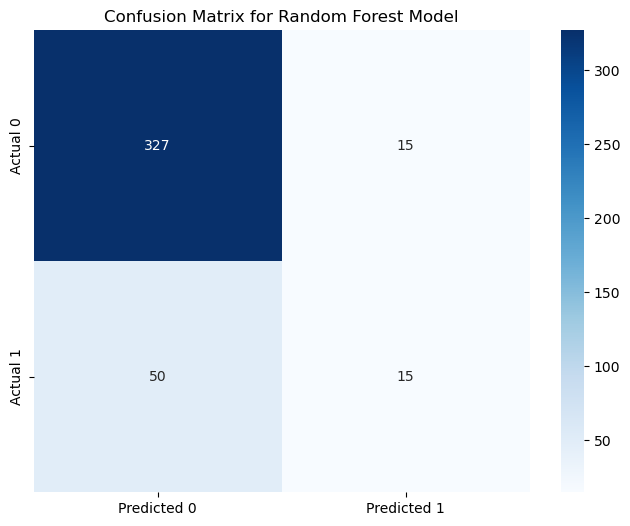

In [77]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

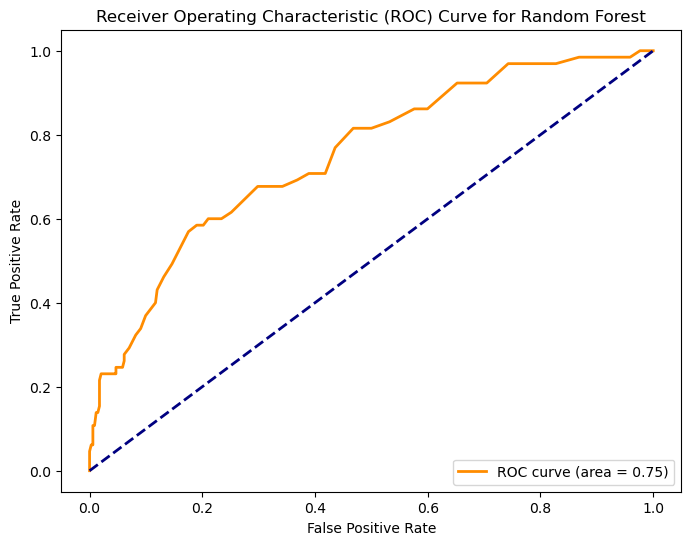

In [96]:
fpr, tpr, _ = roc_curve(y_test, rf_clf.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

随机森林模型评分如下：
1.精确率：对类0，为87%，对类1，为50%；
2.召回率：对类0，为96%，对类1，为23%；
3.F1得分：对类0，为91%，对类1，为32%
4.正确率：84%
5.AUC：0.75

In [100]:
# 模型优化
# 搭建模型
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)
print('Best parameters found:', grid_search.best_params_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


D:\Works\anaconda3\envs\data\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
267 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Works\anaconda3\envs\data\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Works\anaconda3\envs\data\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "D:\Works\anaconda3\envs\data\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "D:\Works\anaconda3\envs

Best parameters found: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [102]:
best_rf = grid_search.best_estimator_
y_pred1 = best_rf.predict(x_test)
class_report1 = classification_report(y_test, y_pred1)
print(class_report1)

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91       342
         1.0       0.55      0.25      0.34        65

    accuracy                           0.85       407
   macro avg       0.71      0.60      0.63       407
weighted avg       0.82      0.85      0.82       407



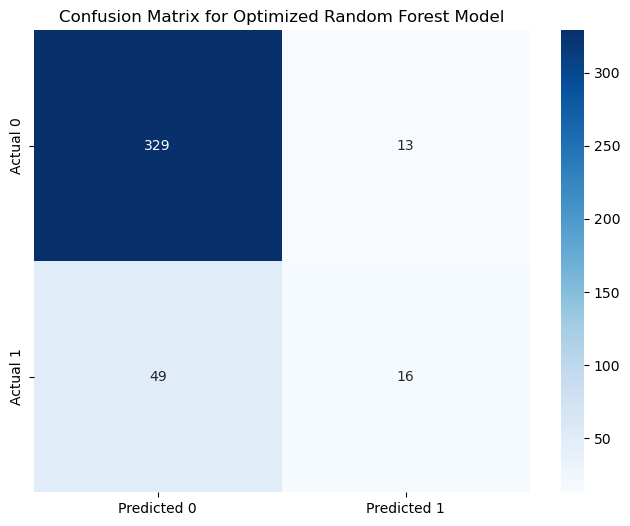

In [103]:
cm1 = confusion_matrix(y_test, y_pred1)

plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Optimized Random Forest Model')
plt.show()

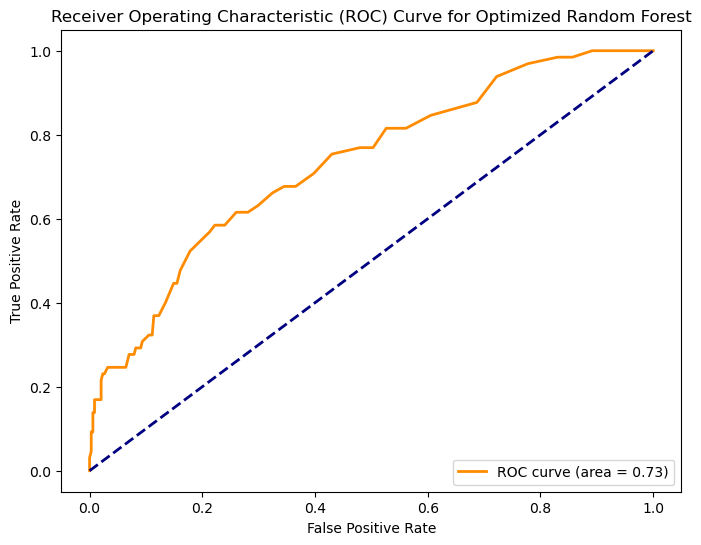

In [104]:
fpr_orf, tpr_orf, _ = roc_curve(y_test, best_rf.predict_proba(x_test)[:, 1])
roc_auc_orf = auc(fpr_orf, tpr_orf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_orf, tpr_orf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_orf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Optimized Random Forest')
plt.legend(loc="lower right")
plt.show()

优化后的随机森林模型评分如下：
1.精确率：对类0，为87%，对类1，为55%；
2.召回率：对类0，为96%，对类1，为25%；
3.F1得分：对类0，为91%，对类1，为34%
4.正确率：84%
5.AUC：0.73
相比为优化的随机森林模型性能提升不大，可以采用其他机器学习模型进行预测。

In [107]:
rf_fi = best_rf.feature_importances_
fnames = x_train.columns
rf_feature = pd.DataFrame({
    'Feature': fnames,
    'Importance': rf_fi
})
rf_f_sort = rf_feature.sort_values(by='Importance', ascending=False).head()
rf_f_sort

,Feature,Importance
9,MonthlyIncome,0.147335
0,Age,0.104247
15,YearsWithCurrManager,0.076308
12,YearsAtCompany,0.068477
13,YearsInCurrentRole,0.057782


在随机森林模型中，特征重要程度排序是：月收入>年龄>与现任经理共事年数>在公司工作年数>担任现职年数。

建议
1.建议减少出差情况，或者对经常出差的员工给予一些福利，留住这一类员工。
2.适当提高人力资源部门和销售部门的福利，留住这两个部门的员工。
3.提高3级学历员工的薪酬待遇，留住中高人才。
4.可以提高员工的工作参与度，有助于他们留在公司。
5.对于年轻的员工更要给予帮助，有助于留住年轻人才。